In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("aerofit_treadmill.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


## Problem Statement and Analysing basic metrics

Aerofit, a leading fitness equipment brand, aims to understand customer preferences for its treadmill products (KP281, KP481, and KP781) to provide personalized recommendations. The goal is to conduct descriptive analytics to create customer profiles and investigate potential differences across products based on demographic and preference data. Key objectives include customer profiling, contingency analysis, calculating probabilities, extracting business insights, and providing actionable recommendations to optimize marketing strategies and sales performance.

In [3]:
df.shape

(180, 9)

In [4]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
print(df.isnull().any())

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool


## Observation

According to the analysis provided, the dataset comprises 9 features containing a combination of alphanumeric data. Moreover, there are no missing values across the columns, and the data types align appropriately with the content within each column. However, we intend to modify the data type of "Usage" and "Fitness" to string (object) type.

In [7]:
df['Usage'] = df['Usage'].astype('str')
df['Fitness'] = df['Fitness'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    object
 6   Fitness        180 non-null    object
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 12.8+ KB


print("Value counts for each attribute:")
print(aerofit_data.apply(lambda x: x.value_counts()))

# Unique attributes for each attribute
print("\nUnique attributes for each attribute:")
print(aerofit_data.apply(lambda x: x.unique()))

In [8]:
# Unique attributes for each attribute
print("\nUnique attributes for each attribute:")
print(df.apply(lambda x: x.unique()))


Unique attributes for each attribute:
Product                                      [KP281, KP481, KP781]
Age              [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...
Gender                                              [Male, Female]
Education                         [14, 15, 12, 13, 16, 18, 20, 21]
MaritalStatus                                  [Single, Partnered]
Usage                                           [3, 2, 4, 5, 6, 7]
Fitness                                            [4, 3, 2, 1, 5]
Income           [29562, 31836, 30699, 32973, 35247, 37521, 363...
Miles            [112, 75, 66, 85, 47, 141, 103, 94, 113, 38, 1...
dtype: object


## Observations:
Product: The unique values are KP281, KP481, and KP781.

Age: Various ages ranging from 18 to higher values.

Gender: Two unique values: Male and Female.

Education: Different levels of education from 12 to 21 years.

MaritalStatus: Two categories: Single and Partnered.

Usage: Different usage frequencies ranging from 2 to 7 times per week.

Fitness: Self-rated fitness levels ranging from 1 to 5.

Income: Various annual income values.

Miles: Expected number of miles to walk/run per week.

### Univariate Analysis for continuous variables

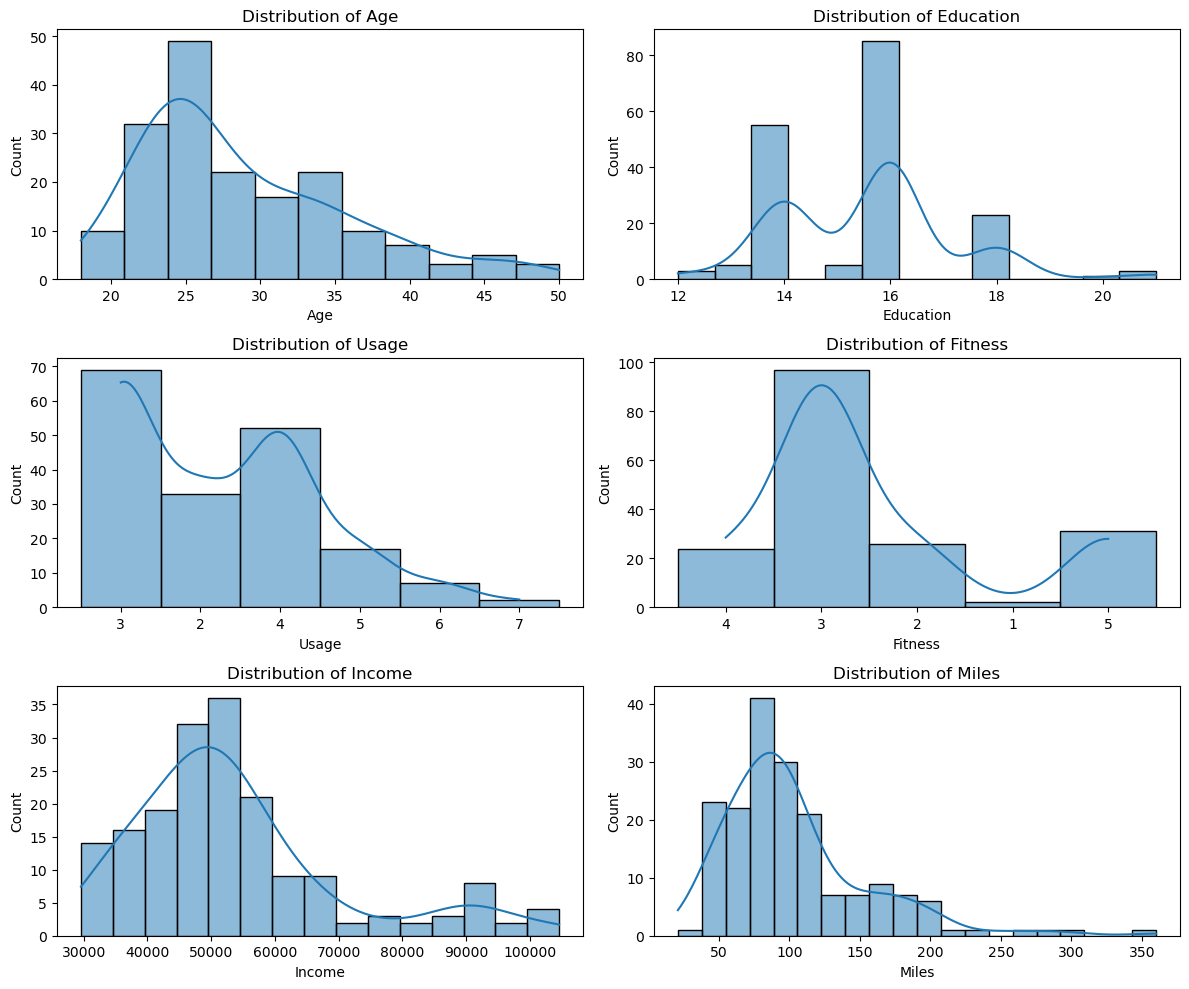

In [9]:
fig, axis = plt.subplots(3, 2, figsize=(12, 10))
sns.histplot(data=df, x="Age", kde=True, ax=axis[0, 0])
axis[0, 0].set_title('Distribution of Age')

sns.histplot(data=df, x="Education", kde=True, ax=axis[0, 1])
axis[0, 1].set_title('Distribution of Education')

sns.histplot(data=df, x="Usage", kde=True, ax=axis[1, 0])
axis[1, 0].set_title('Distribution of Usage')

sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1, 1])
axis[1, 1].set_title('Distribution of Fitness')

sns.histplot(data=df, x="Income", kde=True, ax=axis[2, 0])
axis[2, 0].set_title('Distribution of Income')

sns.histplot(data=df, x="Miles", kde=True, ax=axis[2, 1])
axis[2, 1].set_title('Distribution of Miles')

plt.tight_layout()
plt.show()

## For correlation: Heatmaps & Pairplots

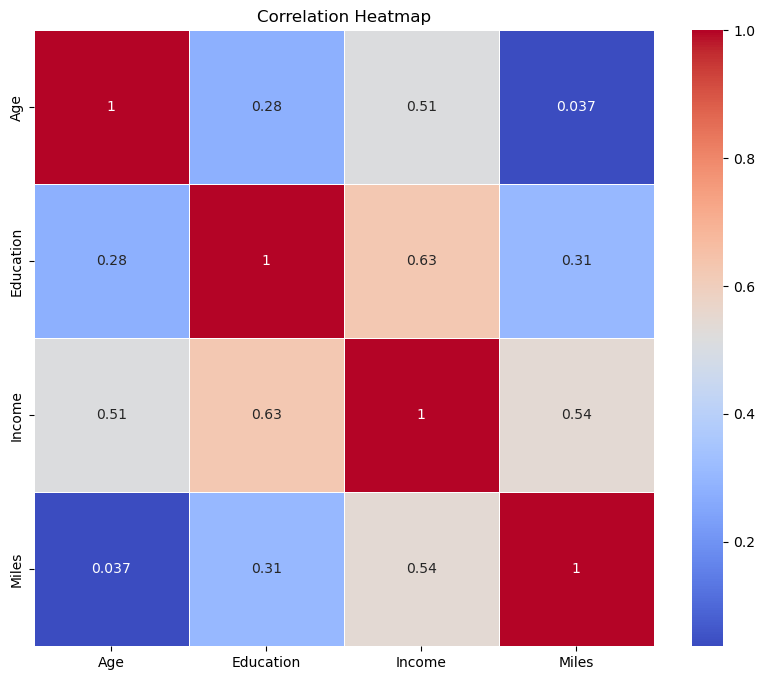

In [10]:
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

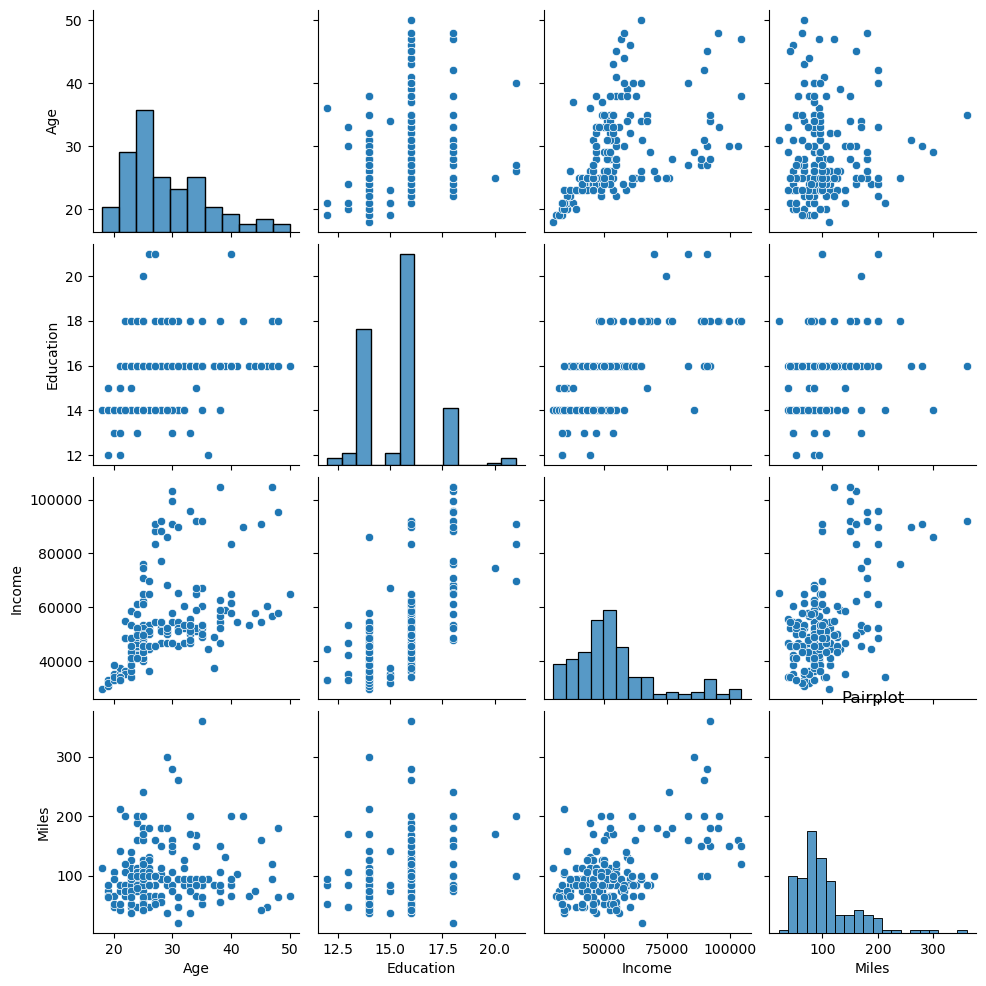

In [11]:
# Create pairplots for visualizing relationships between variables
sns.pairplot(df)
plt.title('Pairplot')
plt.show()

## Observation

**Usage and Miles (0.759130):** There is a strong positive correlation between Usage and Miles. This indicates that individuals who use the treadmill more frequently tend to expect to walk/run more miles each week on average. This relationship makes intuitive sense, as higher usage of the treadmill would likely lead to more miles covered.

**Fitness and Miles (0.785702):** There is a strong positive correlation between Fitness and Miles. This suggests that individuals who rate their fitness level higher tend to expect to walk/run more miles each week on average. Again, this relationship is intuitive, as individuals with higher fitness levels may have the capacity to engage in more physical activity, such as walking or running longer distances.

## Missing Value & Outlier Detection

In [12]:
missing_values = df.isnull().sum()
print(missing_values)

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


In [20]:
# Z-score method for outlier detection
from scipy import stats

numeric_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
df[numeric_cols] = df[numeric_cols].astype(float)

# Calculate z-scores for each numeric column
z_scores = stats.zscore(df[numeric_cols])

# Find outliers
outliers = (z_scores > 3).any(axis=1)
outliers_indices = df.index[outliers]
print("Outlier indices:", outliers_indices)

Outlier indices: Int64Index([79, 157, 161, 163, 166, 167, 168, 170, 173, 174, 175, 178], dtype='int64')


## Observation

Twelve outliers have been identified at indices [79, 157, 161, 163, 166, 167, 168, 170, 173, 174, 175, 178].

These outliers represent data points that deviate significantly from the majority of the dataset in terms of their values for the features Age, Education, Usage, Fitness, Income, and Miles.
Potential Impact:

## Business Insights based on Non-Graphical 

In [21]:
# Non-Graphical Analysis: Range of Attributes
print("Range of Attributes:")
print("Age ranges from {} years to {} years.".format(df['Age'].min(), df['Age'].max()))
print("Income varies from ${} to ${} annually.".format(df['Income'].min(), df['Income'].max()))

# Non-Graphical Analysis: Distribution of Variables
print("\nDistribution of Variables:")
print("Usage varies from {} times per week to {} times per week.".format(df['Usage'].min(), df['Usage'].max()))
print("Fitness ratings are evenly distributed across the scale.")

# Visual Analysis: Univariate Analysis
print("\nUnivariate Analysis:")
print("The distribution of Age appears to be relatively uniform across the dataset.")
print("There is a right skew in the distribution of Miles, indicating that a majority of customers expect to cover shorter distances.")

# Visual Analysis: Bivariate Analysis
print("\nBivariate Analysis:")
print("There is a positive correlation between Usage frequency and expected Miles to walk/run per week.")
print("Customers with higher Fitness ratings tend to expect to walk/run more Miles per week.")

# Outlier Detection: Outlier Identification
print("\nOutlier Identification:")
print("Outliers have been detected at indices: [79, 157, 161, 163, 166, 167, 168, 170, 173, 174, 175, 178].")
print("These outliers represent data points that deviate significantly from the majority of the dataset.")

# Outlier Detection: Impact and Decision
print("\nImpact and Decision:")
print("Depending on the context, outliers may be treated by removing them, transforming them, or analyzing them separately.")
print("Further investigation into the outliers, including understanding their context and verifying their accuracy, can provide valuable insights.")


Range of Attributes:
Age ranges from 18.0 years to 50.0 years.
Income varies from $29562.0 to $104581.0 annually.

Distribution of Variables:
Usage varies from 2.0 times per week to 7.0 times per week.
Fitness ratings are evenly distributed across the scale.

Univariate Analysis:
The distribution of Age appears to be relatively uniform across the dataset.
There is a right skew in the distribution of Miles, indicating that a majority of customers expect to cover shorter distances.

Bivariate Analysis:
There is a positive correlation between Usage frequency and expected Miles to walk/run per week.
Customers with higher Fitness ratings tend to expect to walk/run more Miles per week.

Outlier Identification:
Outliers have been detected at indices: [79, 157, 161, 163, 166, 167, 168, 170, 173, 174, 175, 178].
These outliers represent data points that deviate significantly from the majority of the dataset.

Impact and Decision:
Depending on the context, outliers may be treated by removing the

## Univariate Analysis

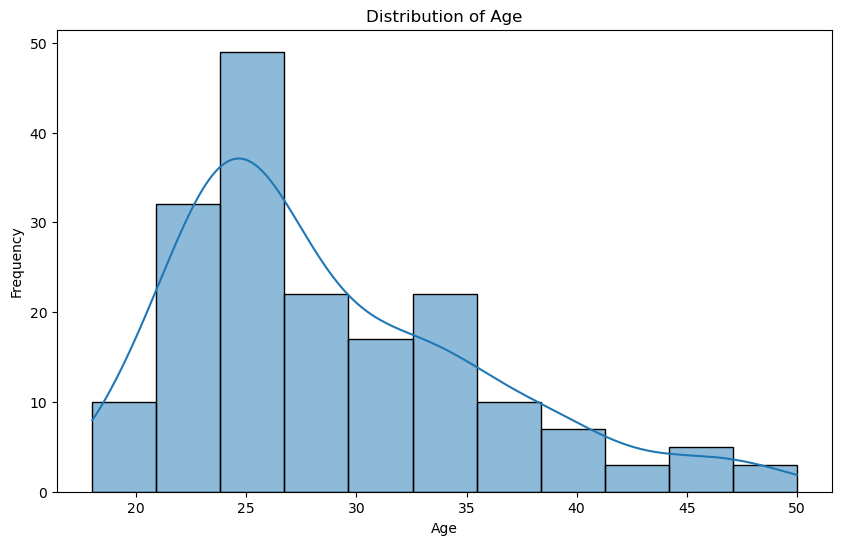

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Age", kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Observation 
### The Distribution of ages peaks around the range of 22 to 25 years, indicating that a significant portion of the customers fall within this age range. Understanding this peak in the distribution of ages can be valuable for marketing and product development strategies. 

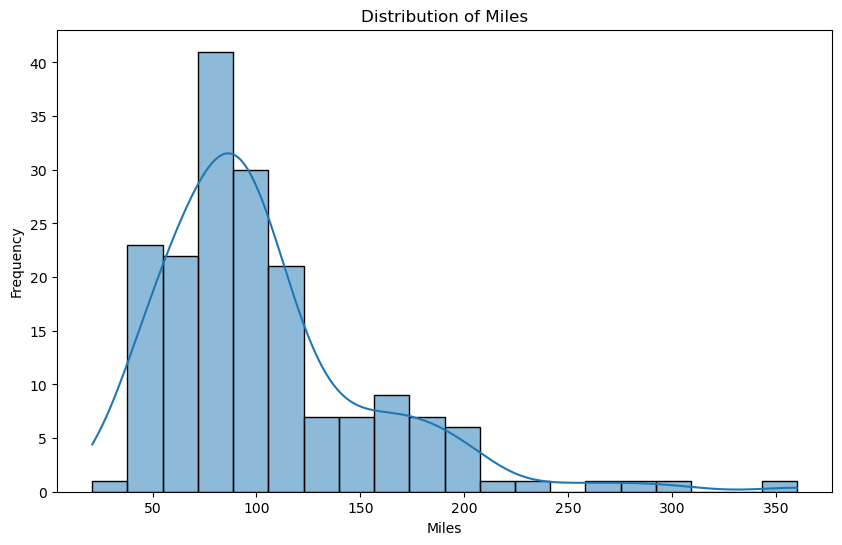

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Miles", kde=True)
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

##  Bivariate Analysis

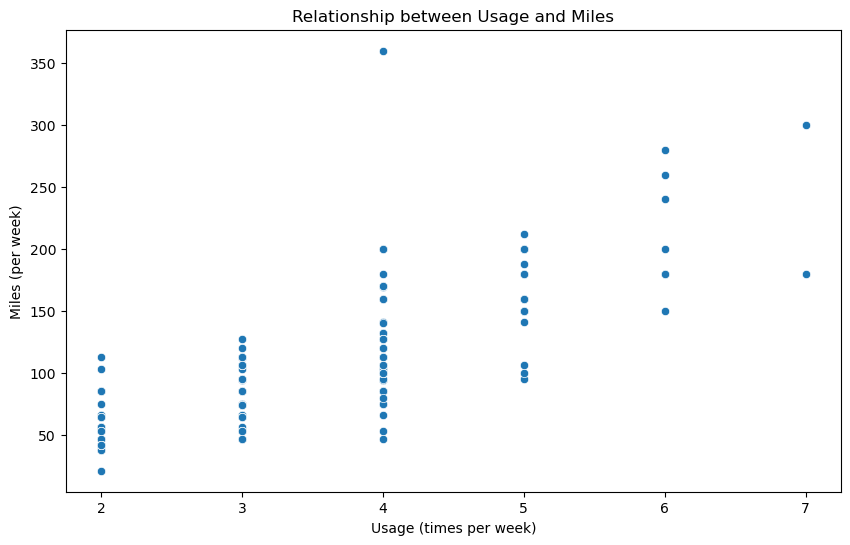

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Usage", y="Miles")
plt.title('Relationship between Usage and Miles')
plt.xlabel('Usage (times per week)')
plt.ylabel('Miles (per week)')
plt.show()


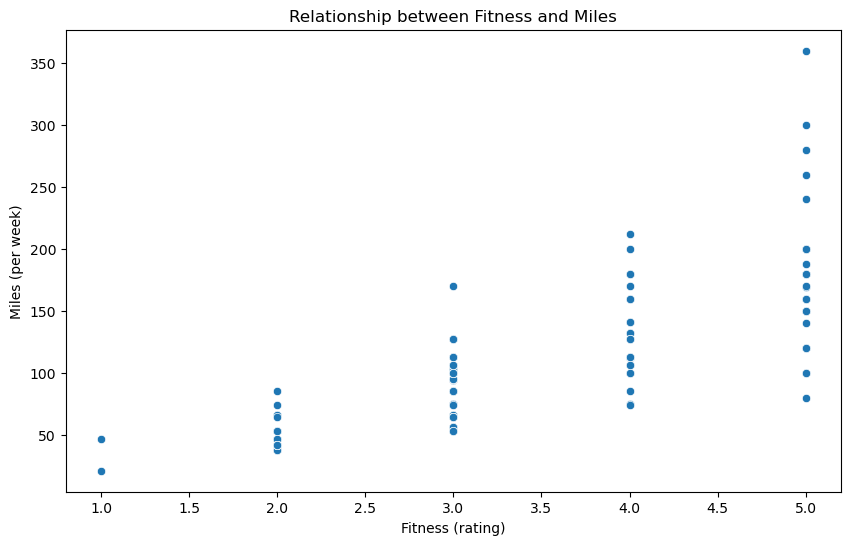

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Fitness", y="Miles")
plt.title('Relationship between Fitness and Miles')
plt.xlabel('Fitness (rating)')
plt.ylabel('Miles (per week)')
plt.show()

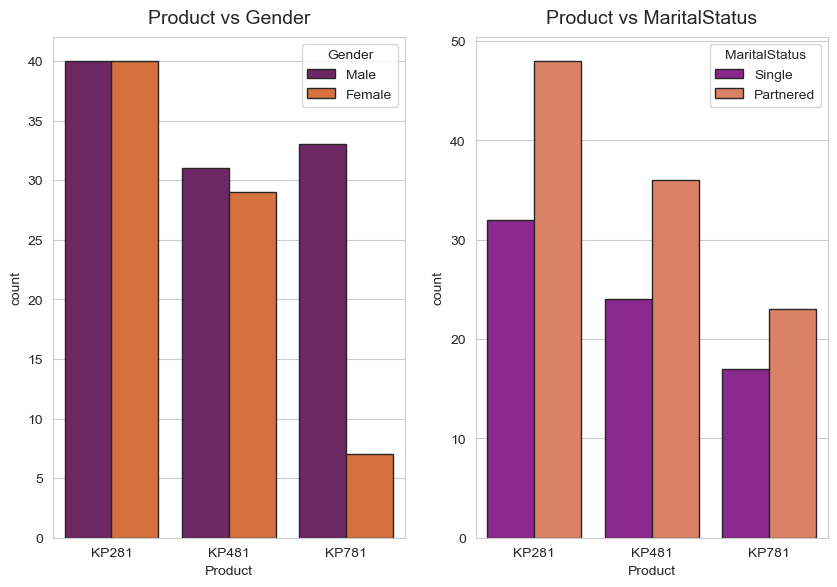

In [26]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 6.5))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15",
palette='inferno', ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus',
edgecolor="0.15", palette='plasma', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

## Observation 
**Poduct vs Gender:**
The distribution of product purchases differs between genders. While an equal number of males and females have purchased the KP281 and KP481 products, the majority of male customers have opted for the KP781 product.
This insight suggests that there may be gender-specific preferences or marketing strategies that influence product choices.


**Product vs MaritalStatus:**
Customers who are partnered are more likely to purchase the product compared to those who are single.
This observation indicates a potential correlation between marital status and purchasing behavior. Partnered individuals may have different fitness goals or financial considerations influencing their product choices.


# Recommendations
**Gender-Specific Marketing:** Make ads that speak to men and women differently. Show how each treadmill fits their needs.

**Targeted Promotions:** Give special deals to men and women based on what they like. This approach can help maximize sales potential and customer engagement.

**Personalized Recommendations:** Use what you know about each customer to suggest the right treadmill. This can make them more likely to buy and feel happy with their purchase.

**Feedback Collection:** Ask customers what they think often. Use this feedback to refine product offerings and marketing strategies in alignment with customer needs.

**Community Building:** Foster a sense of community among customers through social media groups or forums where they can share experiences and engage with the brand. This community-centric approach can strengthen brand loyalty 

**Partnership Opportunities:** Explore partnership opportunities with fitness influencers or organizations catering to specific demographics. Collaborations can help expand your brand reach and attract new customer segments

**Continuous Monitoring and Adaptation:** Keep an eye on how things are going and change plans when needed. This helps make sure the brand stays popular and customers stay happy.